<a href="https://colab.research.google.com/github/pallabm22/Handwritten_digit_classification/blob/main/Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [4]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [5]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3054 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1456 - accuracy: 0.9565
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0699 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

Training data accuracy = 98.9%

**Accuracy on Test data:**

In [7]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0948 - accuracy: 0.9739
0.9739000201225281


Test data accuracy = 97.1%

In [8]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [10]:
print(Y_pred[0])

[8.8755754e-05 4.8671097e-02 6.7676711e-01 9.6270430e-01 2.9566040e-08
 6.8577722e-02 1.0893159e-12 9.9999940e-01 1.0180116e-03 1.8949902e-02]


model.predict() gives the prediction probability of each class for that data point

In [11]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [12]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [13]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

Building a Predictive System

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


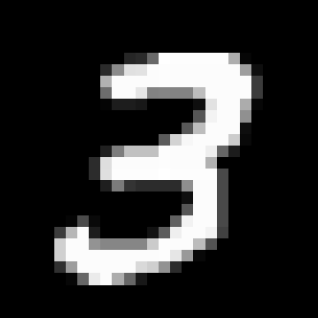

1/1 [==============================] - 0s 27ms/step
The Handwritten Digit is recognised as  3


In [14]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)